In [99]:
import pandas as pd
import numpy as np
import re

In [100]:
baseball_2019_bat = pd.read_csv('./data/19년_타자_기록.csv', sep='\t', encoding='utf-8')

In [101]:
baseball_2019_pit = pd.read_csv('./data/19년_투수_기록.csv', sep='\t', encoding='utf-8')

In [102]:
baseball_2019_bat.shape

(301, 20)

In [103]:
baseball_2019_pit.shape

(257, 21)

In [104]:
baseball_2019_bat.head()

,#,선수명,팀명,타석,타율,BABIP,볼넷%,삼진%,볼/삼,ISO,타수/홈런,OPS,RC,RC/27,wRC,SPD,wSB,wOBA,wRAA,WAR
0,1,양의지,NC,459,0.354,0.354,10.5,9.4,1.12,0.220,19.50,1.012,98.53,9.71,99.49,2.52,-0.48,0.441,45.46,7.02
1,2,김하성,Hero,625,0.307,0.328,11.2,12.8,0.88,0.184,28.42,0.880,110.96,7.53,106.70,6.29,4.41,0.389,33.14,6.77
2,3,최정,SK,606,0.292,0.303,11.6,15.2,0.76,0.227,17.34,0.918,113.01,8.25,110.90,3.97,-0.14,0.403,39.58,6.63
3,4,샌즈,Hero,613,0.305,0.329,12.6,16.5,0.76,0.238,18.75,0.939,113.10,7.85,116.56,2.39,-0.52,0.411,44.42,6.09
4,5,로하스,KT,578,0.322,0.377,8.5,20.8,0.41,0.208,21.71,0.911,107.45,7.93,102.10,4.17,-0.95,0.396,34.07,5.56


In [105]:
baseball_2019_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 20 columns):
#        301 non-null int64
선수명      301 non-null object
팀명       301 non-null object
타석       301 non-null int64
타율       301 non-null object
BABIP    301 non-null object
볼넷%      301 non-null object
삼진%      301 non-null object
볼/삼      301 non-null object
ISO      301 non-null object
타수/홈런    301 non-null object
OPS      301 non-null object
RC       301 non-null object
RC/27    301 non-null object
wRC      301 non-null object
SPD      301 non-null object
wSB      301 non-null float64
wOBA     301 non-null object
wRAA     301 non-null object
WAR      301 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 47.2+ KB


In [106]:
baseball_2019_bat[['WAR']] = baseball_2019_bat[['WAR']].apply(pd.to_numeric, errors='coerce')

In [107]:
baseball_2019_pit[['WAR']] = baseball_2019_pit[['WAR']].apply(pd.to_numeric, errors='coerce')

In [108]:
baseball_2019_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 20 columns):
#        301 non-null int64
선수명      301 non-null object
팀명       301 non-null object
타석       301 non-null int64
타율       301 non-null object
BABIP    301 non-null object
볼넷%      301 non-null object
삼진%      301 non-null object
볼/삼      301 non-null object
ISO      301 non-null object
타수/홈런    301 non-null object
OPS      301 non-null object
RC       301 non-null object
RC/27    301 non-null object
wRC      301 non-null object
SPD      301 non-null object
wSB      301 non-null float64
wOBA     301 non-null object
wRAA     301 non-null object
WAR      295 non-null float64
dtypes: float64(2), int64(2), object(16)
memory usage: 47.2+ KB


In [109]:
baseball_2019_bat.sort_values(by='팀명',ascending=False).head()

,#,선수명,팀명,타석,타율,BABIP,볼넷%,삼진%,볼/삼,ISO,타수/홈런,OPS,RC,RC/27,wRC,SPD,wSB,wOBA,wRAA,WAR
232,233,장운호,한화,12,0.100,0.111,8.3,8.3,1.00,0.000,-,0.282,0.15,0.37,-0.47,8.62,-0.48,0.152,-1.88,-0.23
109,110,지성준,한화,109,0.250,0.296,4.6,19.3,0.24,0.115,52.00,0.649,10.10,3.37,9.01,1.19,0.03,0.290,-3.82,0.13
186,187,변우혁,한화,61,0.226,0.314,11.5,27.9,0.41,0.076,53.00,0.630,5.04,3.09,5.72,0.15,0.03,0.302,-1.46,-0.07
129,130,김민하,한화,140,0.256,0.361,6.4,29.3,0.22,0.096,62.50,0.671,13.92,3.72,13.79,3.36,0.01,0.308,-2.69,0.05
31,32,호잉,한화,525,0.284,0.314,7.2,17.1,0.42,0.176,26.44,0.800,76.60,5.74,71.18,6.07,0.87,0.350,9.39,2.73


In [110]:
baseball_2019_pit.sort_values(by='팀명',ascending=False).head()

,#,선수명,팀명,승,패,세,홀드,블론,경기,선발,...,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
52,53,이태양,한화,1,6,0,10,5,55,1,...,8.64,1.76,1.08,0.342,58.4,5.80,-0.10,3.76,3.52,0.94
150,151,황영국,한화,0,0,0,0,0,6,0,...,13.50,2.25,4.50,0.545,96.8,6.75,0.02,7.65,6.96,0.02
246,247,박주홍,한화,0,4,0,1,1,29,6,...,6.34,5.63,1.88,0.344,60.8,7.98,-0.73,6.74,6.87,-0.30
248,249,박윤철,한화,0,1,0,0,0,15,3,...,6.60,9.00,1.20,0.209,72.9,5.10,0.23,6.97,7.23,-0.33
191,192,윤호솔,한화,0,0,0,0,0,3,0,...,4.91,7.36,2.45,0.438,41.7,17.18,-0.26,8.31,8.61,-0.05


In [114]:
bat_2019= baseball_2019_bat.groupby('팀명')['WAR'].mean().sort_values(ascending=False)

In [115]:
pit_2019 = baseball_2019_pit.groupby('팀명')['WAR'].mean().sort_values(ascending=False)

In [119]:
sum_2019 = (bat_2019 + pit_2019)/2

sum_2019.sort_values(ascending=False)

팀명
Hero    1.211304
두산      0.975318
SK      0.723794
NC      0.677225
LG      0.559815
KT      0.538022
삼성      0.514143
KIA     0.512250
롯데      0.342227
한화      0.336674
Name: WAR, dtype: float64

In [132]:
baseball_2019_bat.columns

Index(['#', '선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP',
       'WAR'],
      dtype='object')

In [141]:
baseball_2019_bat[['타율']] = baseball_2019_bat[['타율']].apply(pd.to_numeric, errors='coerce')

In [142]:
baseball_2019_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 20 columns):
#        301 non-null int64
선수명      301 non-null object
팀명       301 non-null object
타석       301 non-null int64
타율       295 non-null float64
BABIP    301 non-null object
볼넷%      301 non-null object
삼진%      301 non-null object
볼/삼      282 non-null float64
ISO      301 non-null object
타수/홈런    301 non-null object
OPS      301 non-null object
RC       301 non-null object
RC/27    301 non-null object
wRC      301 non-null object
SPD      301 non-null object
wSB      301 non-null float64
wOBA     301 non-null object
wRAA     301 non-null object
WAR      295 non-null float64
dtypes: float64(4), int64(2), object(14)
memory usage: 47.2+ KB


In [149]:
import numpy as np

np.corrcoef( baseball_2019_bat['볼/삼'],baseball_2019_bat['WAR'] )


array([[1.        , 0.58690334],
       [0.58690334, 1.        ]])

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_

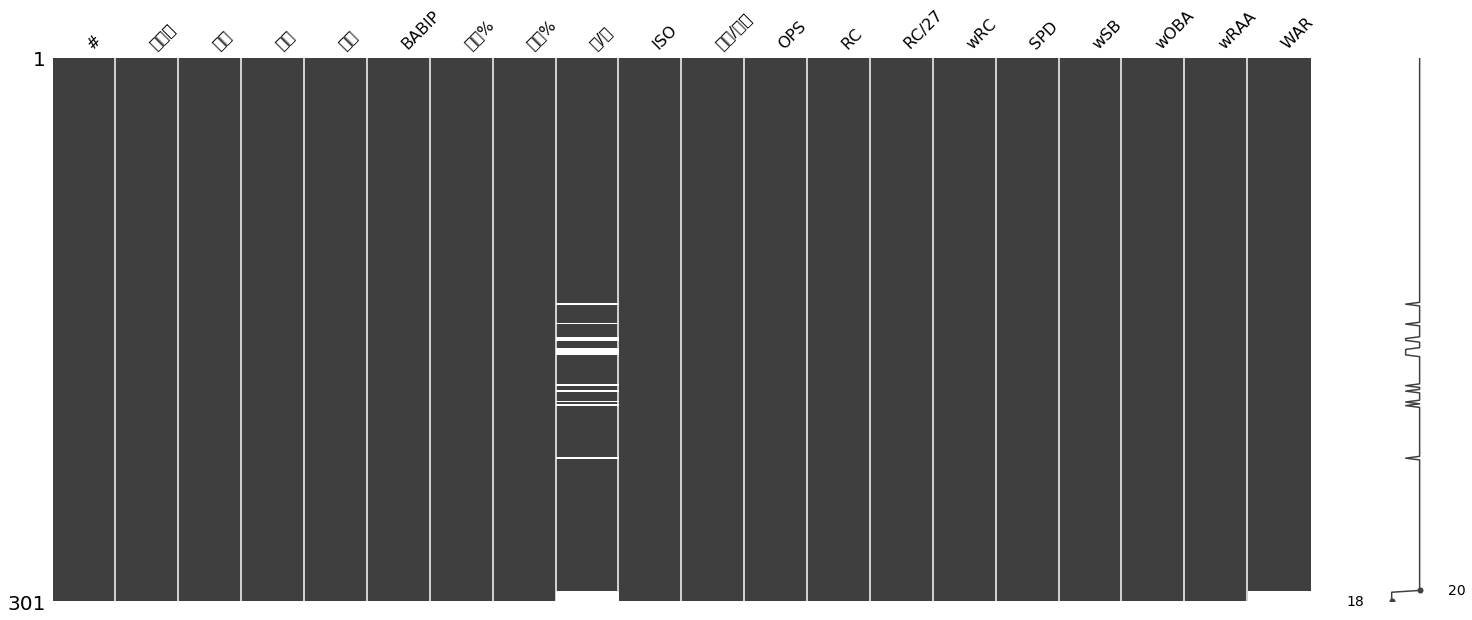

In [138]:
import missingno as msng
msng.matrix(baseball_2019_bat)

In [139]:
baseball_2019_bat.isnull().sum()

#         0
선수명       0
팀명        0
타석        0
타율        0
BABIP     0
볼넷%       0
삼진%       0
볼/삼      19
ISO       0
타수/홈런     0
OPS       0
RC        0
RC/27     0
wRC       0
SPD       0
wSB       0
wOBA      0
wRAA      0
WAR       6
dtype: int64

In [146]:
baseball_2019_bat.dropna(inplace=True)

In [147]:
baseball_2019_bat.isnull().sum()

#        0
선수명      0
팀명       0
타석       0
타율       0
BABIP    0
볼넷%      0
삼진%      0
볼/삼      0
ISO      0
타수/홈런    0
OPS      0
RC       0
RC/27    0
wRC      0
SPD      0
wSB      0
wOBA     0
wRAA     0
WAR      0
dtype: int64

In [159]:
np.corrcoef( baseball_2019_bat['볼/삼'],baseball_2019_bat['WAR'] )

array([[1.        , 0.58690334],
       [0.58690334, 1.        ]])

In [160]:
fp1 = np.polyfit( baseball_2019_bat['볼/삼'],baseball_2019_bat['WAR'] , 1 )
fp1

array([ 2.90847916, -0.53436004])

In [187]:
import matplotlib.pyplot as plt
# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

f1 = np.poly1d( fp1 )
x  = np.linspace( 0, 2, 100 ) 

In [188]:
fp1 = np.polyfit( baseball_2019_bat['볼/삼'],baseball_2019_bat['WAR'] , 1 )
fp1

array([ 2.90847916, -0.53436004])

In [189]:
print(f1), print(x)

 
2.908 x - 0.5344
[0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576

(None, None)

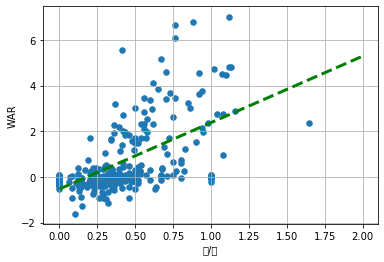

In [190]:
# 시각화
plt.scatter( baseball_2019_bat['볼/삼'],baseball_2019_bat['WAR'], s=30 )
plt.plot( x, f1(x), ls='dashed', lw=3, color='g' )
plt.xlabel('볼/삼')
plt.ylabel('WAR')
plt.grid()
plt.show()